# Linear Regression

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
train_x = np.asarray(
    [3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182,7.59, 
     2.167, 7.042, 10.791, 5.313, 7.997, 5.654, 9.27,3.1])
train_y = np.asarray(
    [1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53,
     1.221, 2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3])
n_samples = train_x.shape[0]

In [4]:
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

w = tf.get_variable('weight', initializer=np.random.randn())
b = tf.get_variable('bias', initializer=np.random.randn())

In [5]:
pred = tf.add(tf.multiply(w, x), b)

In [6]:
loss = tf.reduce_sum(tf.pow(pred - y, 2))/(2 * n_samples)

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

init  = tf.global_variables_initializer()

epoch: 0050 loss= 0.08150210 w = 0.2873 b = 0.5299
epoch: 0100 loss= 0.08097829 w = 0.2851 b = 0.5461
epoch: 0150 loss= 0.08051509 w = 0.2830 b = 0.5613
epoch: 0200 loss= 0.08010551 w = 0.2810 b = 0.5756
epoch: 0250 loss= 0.07974339 w = 0.2791 b = 0.5890
epoch: 0300 loss= 0.07942320 w = 0.2774 b = 0.6016
epoch: 0350 loss= 0.07914013 w = 0.2757 b = 0.6135
epoch: 0400 loss= 0.07888990 w = 0.2742 b = 0.6247
epoch: 0450 loss= 0.07866868 w = 0.2727 b = 0.6352
epoch: 0500 loss= 0.07847312 w = 0.2713 b = 0.6451
epoch: 0550 loss= 0.07830022 w = 0.2700 b = 0.6544
epoch: 0600 loss= 0.07814743 w = 0.2688 b = 0.6631
epoch: 0650 loss= 0.07801233 w = 0.2677 b = 0.6714
epoch: 0700 loss= 0.07789291 w = 0.2666 b = 0.6791
epoch: 0750 loss= 0.07778739 w = 0.2656 b = 0.6864
epoch: 0800 loss= 0.07769410 w = 0.2646 b = 0.6932
epoch: 0850 loss= 0.07761171 w = 0.2637 b = 0.6997
epoch: 0900 loss= 0.07753885 w = 0.2629 b = 0.7057
epoch: 0950 loss= 0.07747447 w = 0.2621 b = 0.7114
epoch: 1000 loss= 0.07741761 w 

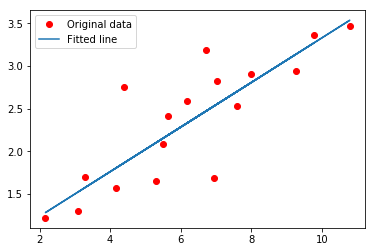

In [7]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        for (each_x, each_y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={x: each_x, y: each_y})
        if (epoch + 1) % display_step == 0:
            cur_loss = sess.run(loss, feed_dict={x: train_x, y: train_y})
            print("epoch: %04d loss= %0.8f w = %0.4f b = %0.4f" 
                  % (epoch + 1, cur_loss, sess.run(w), sess.run(b)))
    
    print('Training finished!')
    training_loss = sess.run(loss, feed_dict={x: train_x, y: train_y})
    print('Training loss = %0.8f w = %0.4f b = %0.4f'
          % (training_loss, sess.run(w), sess.run(b)))
    
    plt.plot(train_x, train_y, 'ro', label='Original data')
    plt.plot(train_x, sess.run(w) * train_x + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()